In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

In [2]:
# Get all file names in current folder
files = os.listdir(".")

In [3]:
# Concatenate all dataframes in a single one
true_labels = np.loadtxt("labels.txt")

In [4]:
resnets = ["resnet20"]
models = ["vfsue slow", "lla last_layer full", "map", "lla last_layer kron", "ella", "sngp", "mfvi"]
labels = ["VFSUE", "LLA* (full)", "MAP", "LLA* (kron)", "ELLA", "SNGP", "MFVI"]
print("Resnet models: ", resnets)
print("Models: ", models)

Resnet models:  ['resnet20']
Models:  ['vfsue slow', 'lla last_layer full', 'map', 'lla last_layer kron', 'ella', 'sngp', 'mfvi']


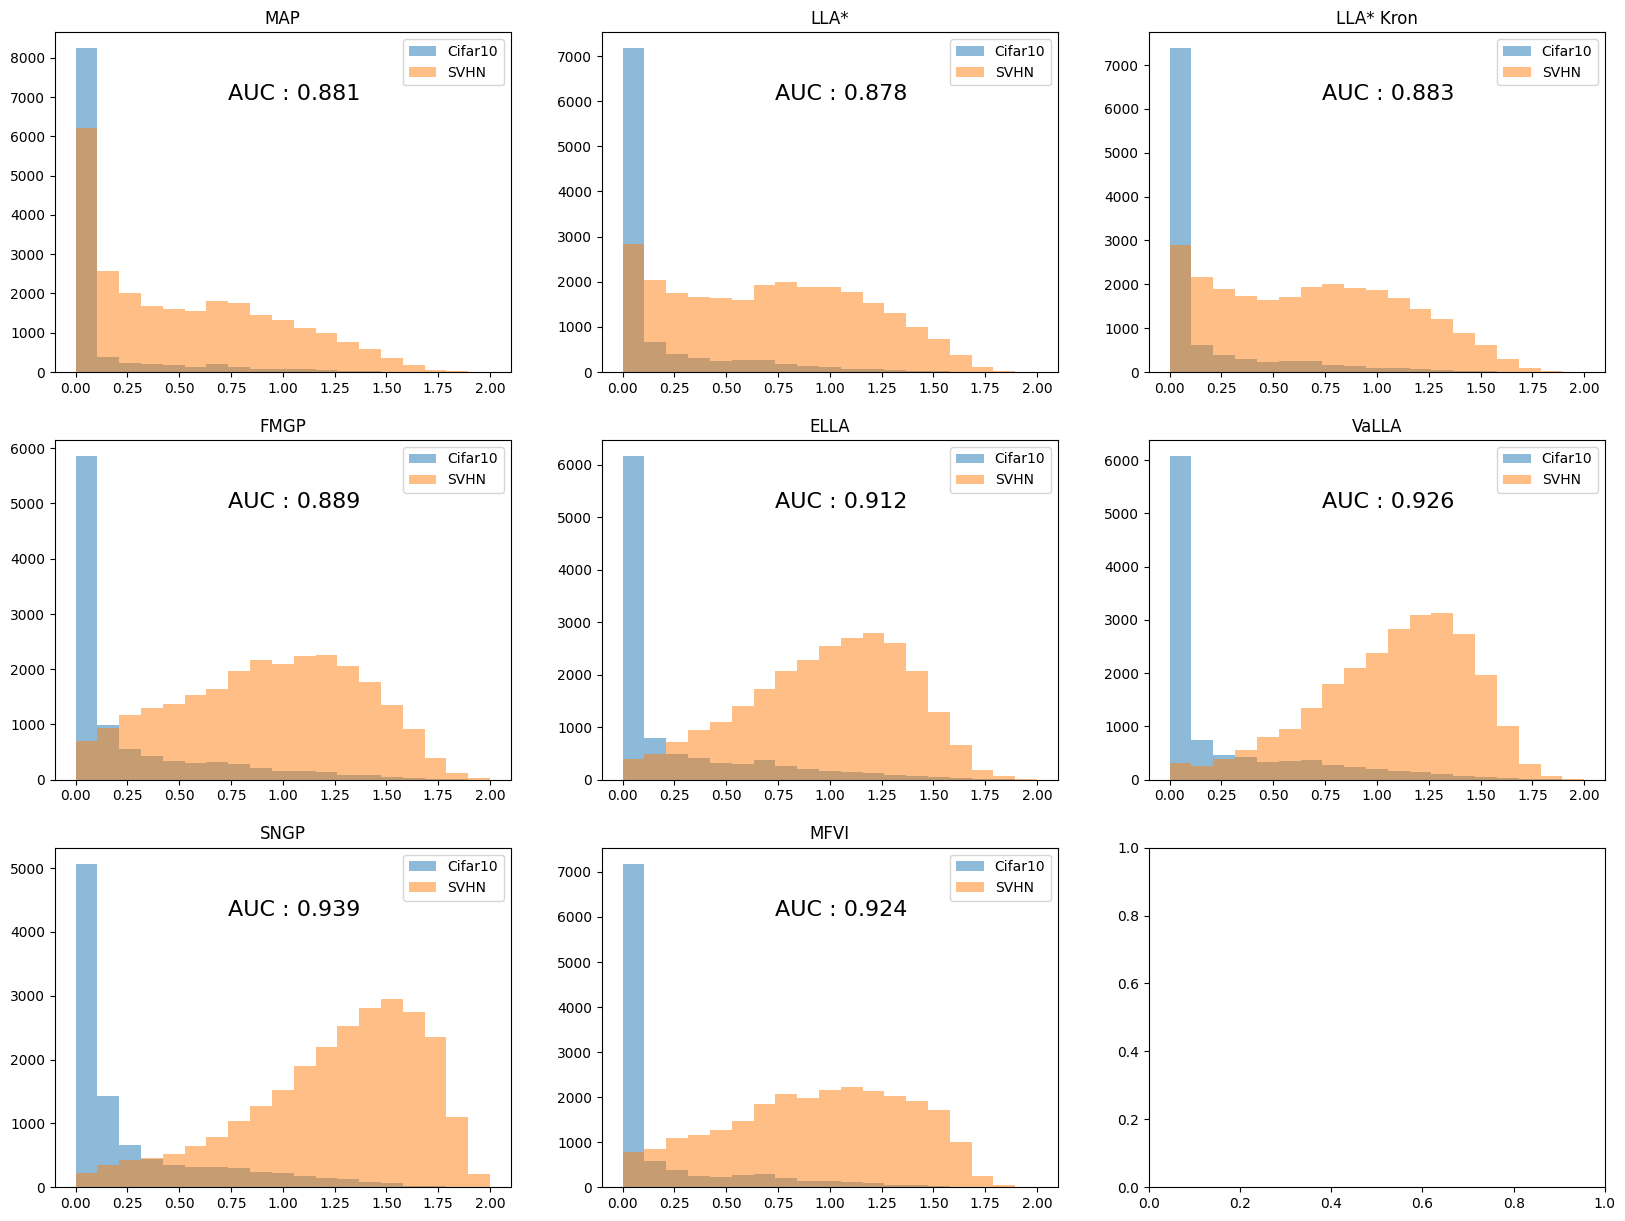

In [5]:
fig, axis = plt.subplots(3, 3, figsize = (20, 15))

bins = np.linspace(0, 2, 20)


def plot_hist(data, axis):
    auc = roc_auc_score(true_labels, data)
    axis.hist(data[true_labels == 0], bins = bins, alpha = 0.5, label = "Cifar10")
    axis.hist(data[true_labels == 1], bins = bins, alpha = 0.5, label = "SVHN")
    ylim = axis.get_ylim()
    xlim = axis.get_xlim()
    axis.text(0.35*xlim[1], 0.8*ylim[1], "AUC : {:.3f}".format(auc), fontsize = 16)
    axis.legend()

seeds = [0,1,2,3,4]
for resnet in resnets:
    vec = np.array([np.loadtxt(f"map_{resnet}_{seed}.txt") for seed in seeds])
    plot_hist(vec.mean(0), axis[0][0])
    axis[0][0].set_title("MAP")

    vec = np.array([np.loadtxt(f"lla_last_layer_full_{resnet}_{seed}.txt") for seed in seeds])
    plot_hist(vec.mean(0), axis[0][1])
    axis[0][1].set_title("LLA*")

    vec = np.array([np.loadtxt(f"lla_last_layer_kron_{resnet}_{seed}.txt") for seed in seeds])
    plot_hist(vec.mean(0), axis[0][2])
    axis[0][2].set_title("LLA* Kron")

    vec = np.array([np.loadtxt(f"fmgp_{resnet}_{seed}.txt") for seed in seeds])
    plot_hist(vec.mean(0), axis[1][0])
    axis[1][0].set_title("FMGP")

    vec = np.array([np.loadtxt(f"ella_50_0.5_{resnet}_{seed}.txt") for seed in seeds])
    plot_hist(vec.mean(0), axis[1][1])
    axis[1][1].set_title("ELLA")


    vec = np.array([np.loadtxt(f"valla_{resnet}_{seed}.txt") for seed in seeds])
    plot_hist(vec.mean(0), axis[1][2])
    axis[1][2].set_title("VaLLA")
    
    vec = np.array([np.loadtxt(f"sngp_{resnet}_{seed}.txt") for seed in seeds])
    plot_hist(vec.mean(0), axis[2][0])
    axis[2][0].set_title("SNGP")


    vec = np.array([np.loadtxt(f"mfvi_{resnet}_{seed}.txt") for seed in seeds])
    plot_hist(vec.mean(0), axis[2][1])
    axis[2][1].set_title("MFVI")

plt.show()